## Terra Nova Bay Mooring Comparison - 2017 

### Goal: Use various analytical techniques to compare moorings DITN, D, DITS, DITD, and LDEO in 2017 to refine our understanding of winter-time circulation in mid-depths and abyssal. And water mass transformations that may help us infer circulation patterns 

### Techniques: 

Time series visualization, sliding window lag correlations, wavelet analysis, quiver plots, etc... 

### Background information: 





In [52]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr 
import gsw

In [6]:
%matplotlib widget

In [2]:
# Load in datatree 

moorings = xr.open_datatree('/Users/mblan/Documents/research/TNB_tools/examples/TNB_Moorings_DataTree.nc')

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [3]:
moorings

<xarray.DataTree>
Group: /
├── Group: /DITD
│   ├── Group: /DITD/2017
│   │   ├── Group: /DITD/2017/vel
│   │   │   └── Group: /DITD/2017/vel/bot
│   │   │           Dimensions:  (time: 37488)
│   │   │           Coordinates:
│   │   │             * time     (time) datetime64[ns] 300kB 2017-02-08T20:30:00 ... 2018-03-06T0...
│   │   │               z        int64 8B ...
│   │   │               lat      float64 8B ...
│   │   │               lon      float64 8B ...
│   │   │           Data variables: (12/15)
│   │   │               dir      (time) float64 300kB ...
│   │   │               speed    (time) float64 300kB ...
│   │   │               temp     (time) float64 300kB ...
│   │   │               pres     (time) float64 300kB ...
│   │   │               hdgt     (time) float64 300kB ...
│   │   │               pitch    (time) float64 300kB ...
│   │   │               ...       ...
│   │   │               w        (time) float64 300kB ...
│   │   │               volt     (time) float64 300kB ...
│   │   │               amp1     (time) float64 300kB ...
│   │   │               amp2     (time) int64 300kB ...
│   │   │               amp3     (time) int64 300kB ...
│   │   │               depth    (time) float64 300kB ...
│   │   │           Attributes:
│   │   │               description:  Mooring DITD 1702 AQD
│   │   └── Group: /DITD/2017/ctd
│   │       └── Group: /DITD/2017/ctd/bot
│   │               Dimensions:  (time: 281162)
│   │               Coordinates:
│   │                 * time     (time) datetime64[ns] 2MB 2017-02-08T20:28:00 ... 2018-03-06T08:...
│   │                   z        int64 8B ...
│   │                   lat      float64 8B ...
│   │                   lon      float64 8B ...
│   │               Data variables:
│   │                   con      (time) float64 2MB ...
│   │                   temp     (time) float64 2MB ...
│   │                   pres     (time) float64 2MB ...
│   │                   depth    (time) float64 2MB ...
│   │                   sal      (time) float64 2MB ...
│   │                   sigma0   (time) float64 2MB ...
│   │               Attributes:
│   │                   description:  Mooring DITD 1702 SBE37SM
│   ├── Group: /DITD/2018
│   │   ├── Group: /DITD/2018/vel
│   │   │   ├── Group: /DITD/2018/vel/top
│   │   │   │       Dimensions:  (time: 43002)
│   │   │   │       Coordinates:
│   │   │   │         * time     (time) datetime64[ns] 344kB 2018-03-10T16:10:00 ... 2019-01-03T0...
│   │   │   │           z        int64 8B ...
│   │   │   │           lat      float64 8B ...
│   │   │   │           lon      float64 8B ...
│   │   │   │       Data variables: (12/15)
│   │   │   │           dir      (time) float64 344kB ...
│   │   │   │           speed    (time) float64 344kB ...
│   │   │   │           temp     (time) float64 344kB ...
│   │   │   │           pres     (time) float64 344kB ...
│   │   │   │           hdgt     (time) float64 344kB ...
│   │   │   │           pitch    (time) float64 344kB ...
│   │   │   │           ...       ...
│   │   │   │           w        (time) float64 344kB ...
│   │   │   │           volt     (time) float64 344kB ...
│   │   │   │           amp1     (time) float64 344kB ...
│   │   │   │           amp2     (time) float64 344kB ...
│   │   │   │           amp3     (time) float64 344kB ...
│   │   │   │           depth    (time) float64 344kB ...
│   │   │   │       Attributes:
│   │   │   │           description:  Mooring DITD 1803 AQD
│   │   │   └── Group: /DITD/2018/vel/bot
│   │   │           Dimensions:  (time: 43002)
│   │   │           Coordinates:
│   │   │             * time     (time) datetime64[ns] 344kB 2018-03-10T16:10:00 ... 2019-01-03T0...
│   │   │               z        int64 8B ...
│   │   │               lat      float64 8B ...
│   │   │               lon      float64 8B ...
│   │   │           Data variables: (12/15)
│   │   │               dir      (time) float64 344kB ...
│   │   │               speed    (t

In [4]:
# mooring selection
# we want: 2017 data for D, DITN, LDEO, and DITS
# D @ 
D_2017 = moorings['D/2017']
DITN_2017 = moorings['DITN/2017']
DITS_2017 = moorings['DITS/2017']
LDEO = moorings['LDEO/2017']
DITD_2017 = moorings['DITD/2017']

In [20]:
DITD_2017.vel.bot.z.values

array(1239)

Text(0.5, 0.98, 'DITD 2017 1239 meters')

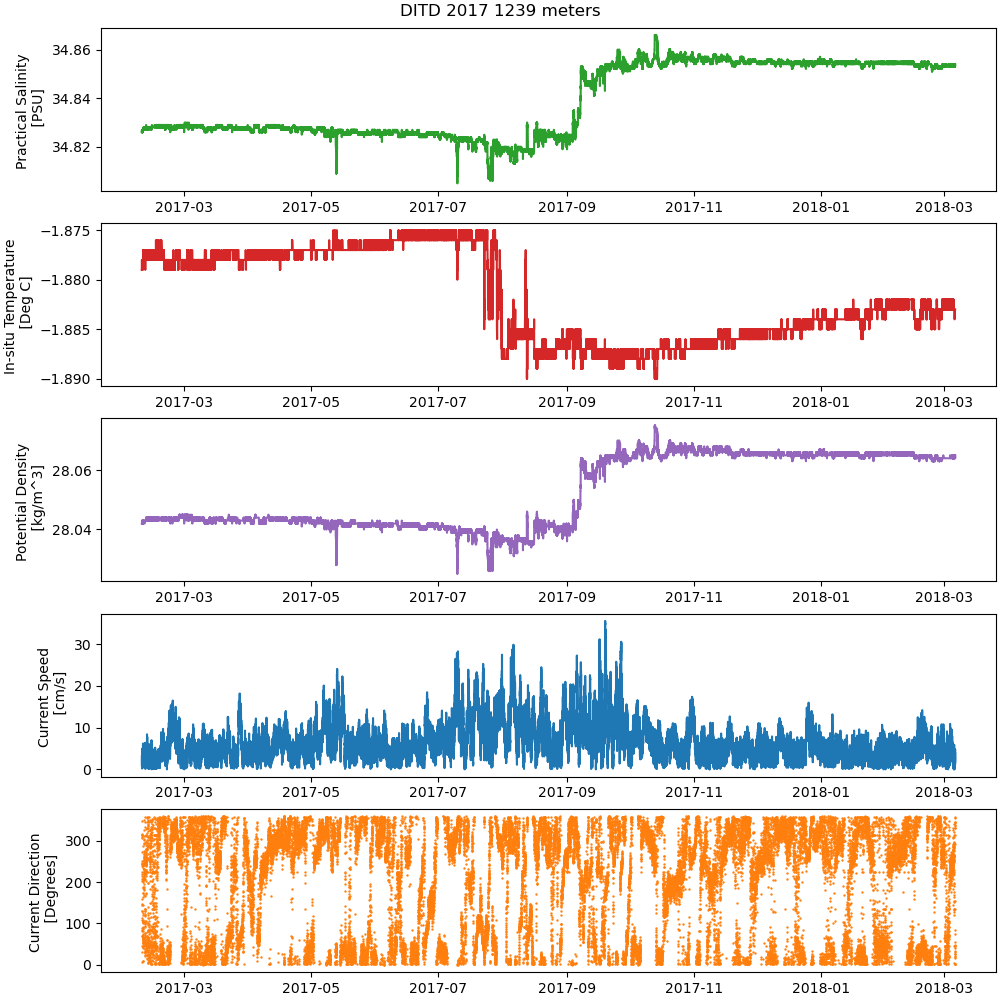

In [25]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITD_2017.ctd.bot
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITD_2017.vel.bot
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITD 2017 1239 meters')

In [33]:
DITS_2017.ctd.bot

<xarray.DataTree 'bot'>
Group: /DITS/2017/ctd/bot
    Dimensions:  (time: 112059)
    Coordinates:
      * time     (time) datetime64[ns] 896kB 2017-02-12T12:00:00 ... 2018-03-08T1...
        z        int64 8B 1088
        lat      float64 8B ...
        lon      float64 8B ...
    Data variables:
        con      (time) float64 896kB ...
        temp     (time) float64 896kB -1.882 -1.882 -1.882 -1.882 ... nan nan nan
        pres     (time) float64 896kB ...
        depth    (time) float64 896kB ...
        sal      (time) float64 896kB 34.83 34.83 34.83 34.83 ... nan nan nan nan
        sigma0   (time) float64 896kB 28.04 28.04 28.04 28.04 ... nan nan nan nan
    Attributes:
        description:  Mooring DITS 1702 SBE37SM

Text(0.5, 0.98, 'DITS 2017 1088 meters')

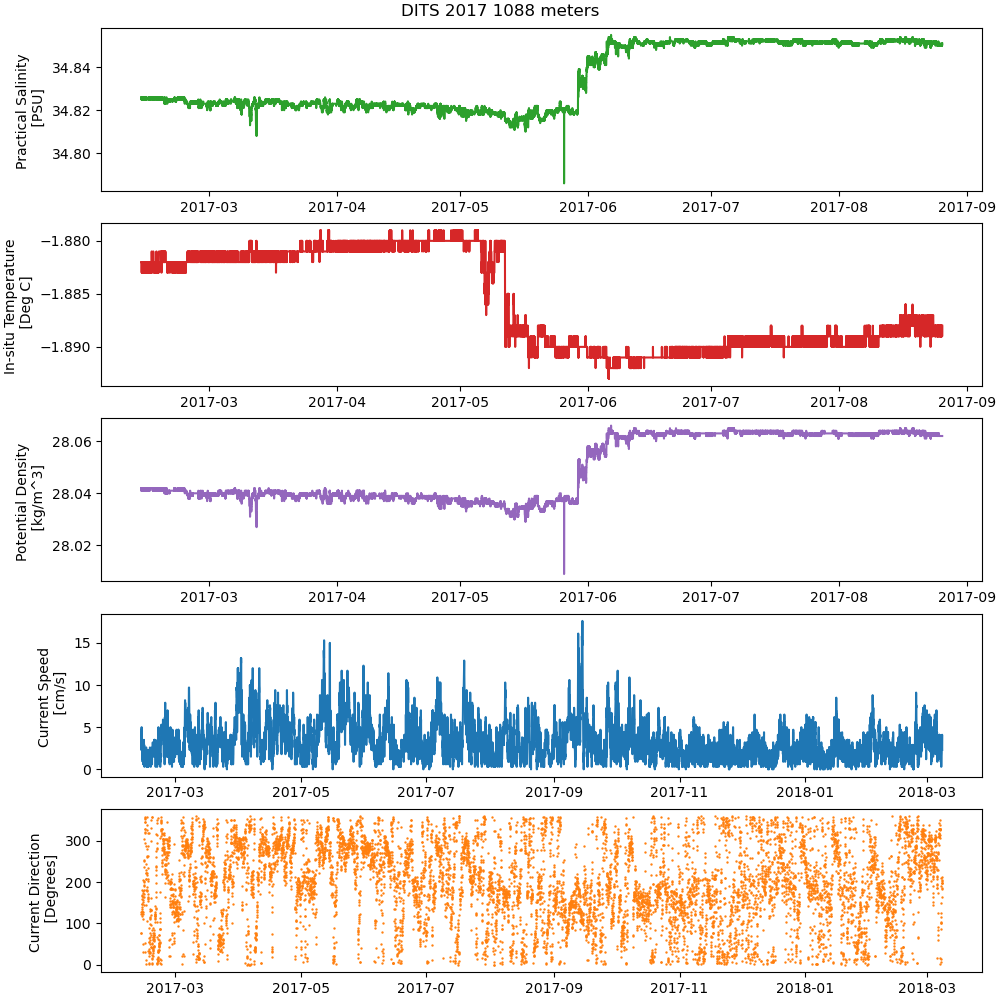

In [32]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITS_2017.ctd.bot
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITS_2017.vel.bot
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITS 2017 1088 meters')

#### Question: 

Why does DITS ctd data stop in 2017-09? 



In [35]:
ds.z.values

array(191)

Text(0.5, 0.98, 'DITS 2017 191 meters')

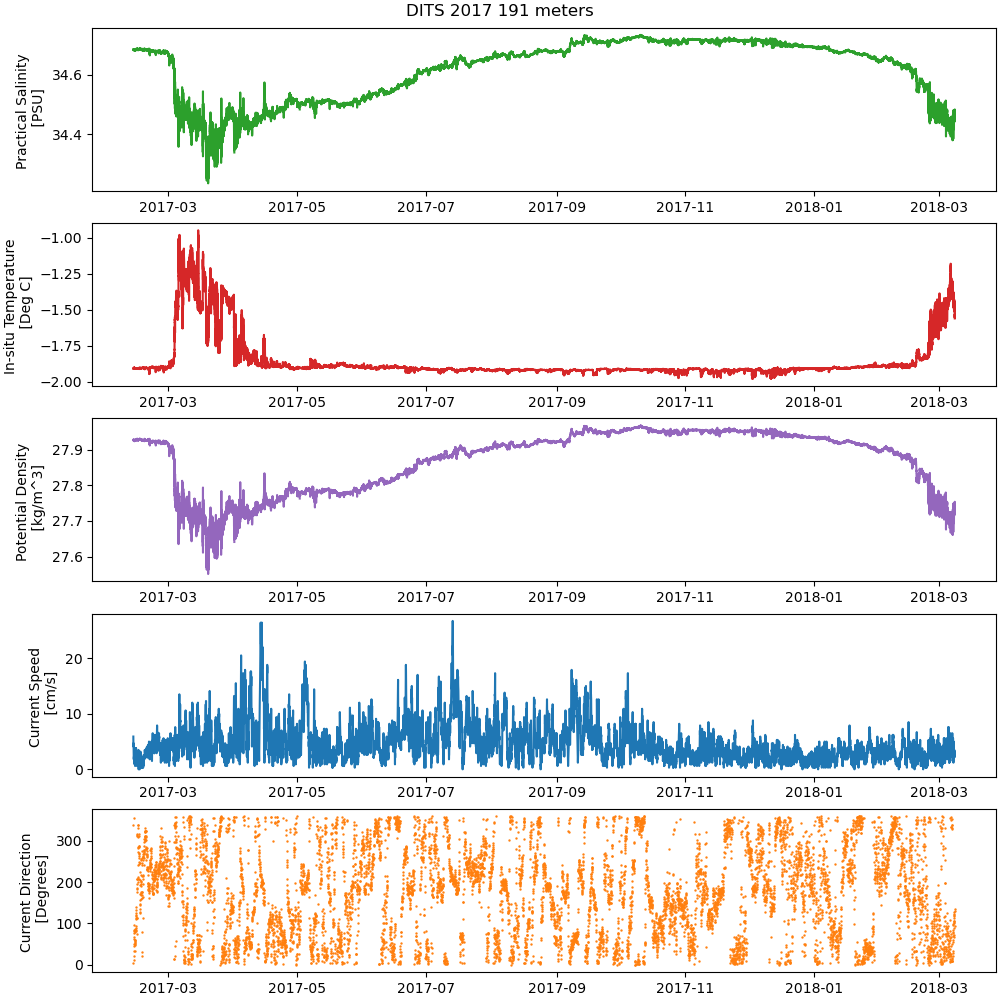

In [36]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITS_2017.ctd.top
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITS_2017.vel.top
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITS 2017 191 meters')

Text(0.5, 0.98, 'DITS 2017 384 meters')

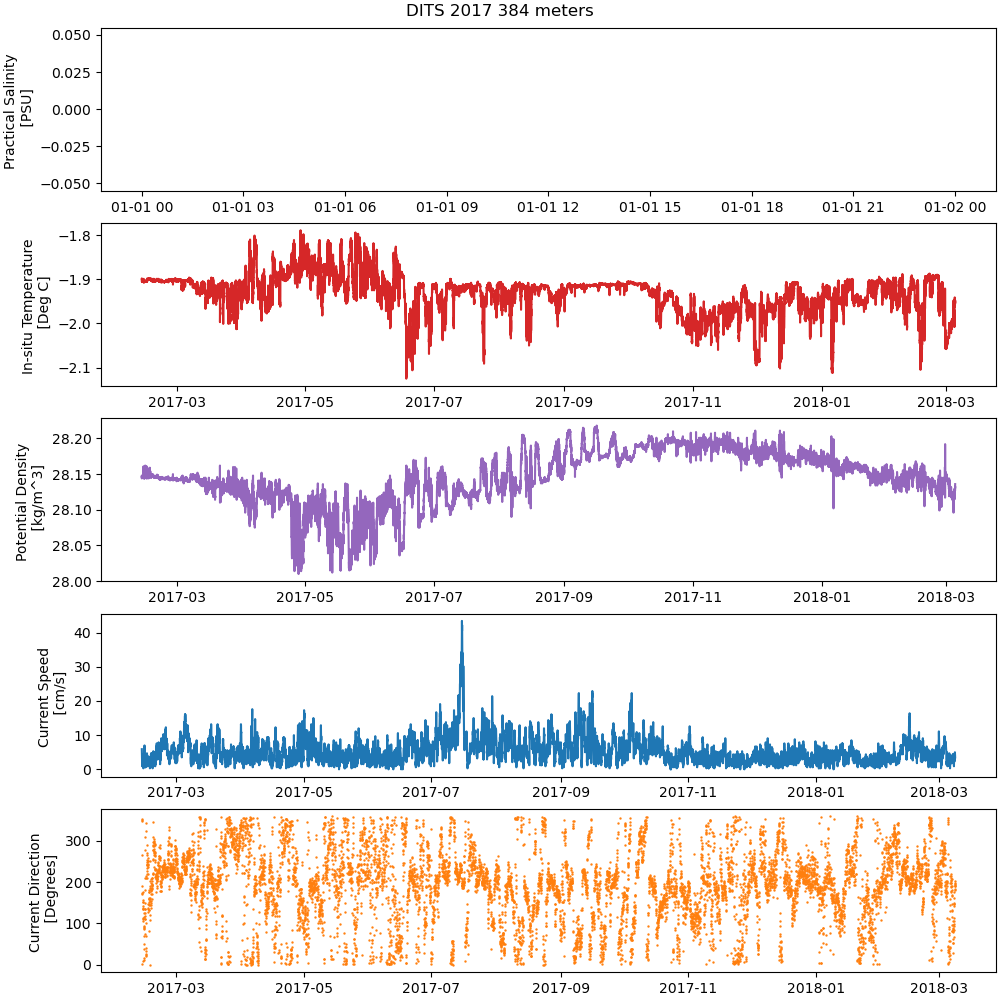

In [39]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITS_2017.ctd.mid
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITS_2017.vel.mid
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITS 2017 384 meters')

#### Question:

why is there no salinity data at DITS 384 meters in 2017? This data has been cited in Stevens et al. 2024 yet Liv's paper states "faulty P and S data removed" 

In [42]:
ds.z.values

array(76)

Text(0.5, 0.98, 'DITN 2017 76 meters')

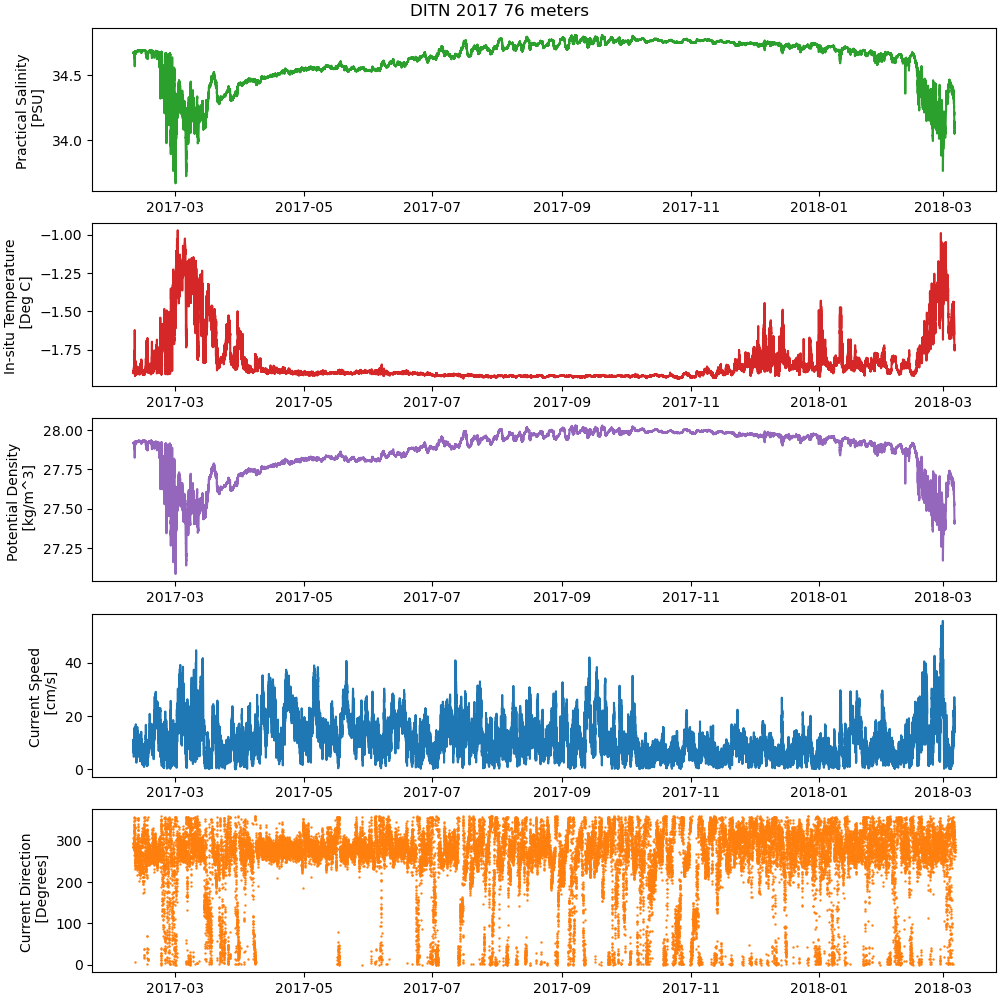

In [43]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITN_2017.ctd.top
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITN_2017.vel.top
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITN 2017 76 meters')

Text(0.5, 0.98, 'DITN 2017 271 meters')

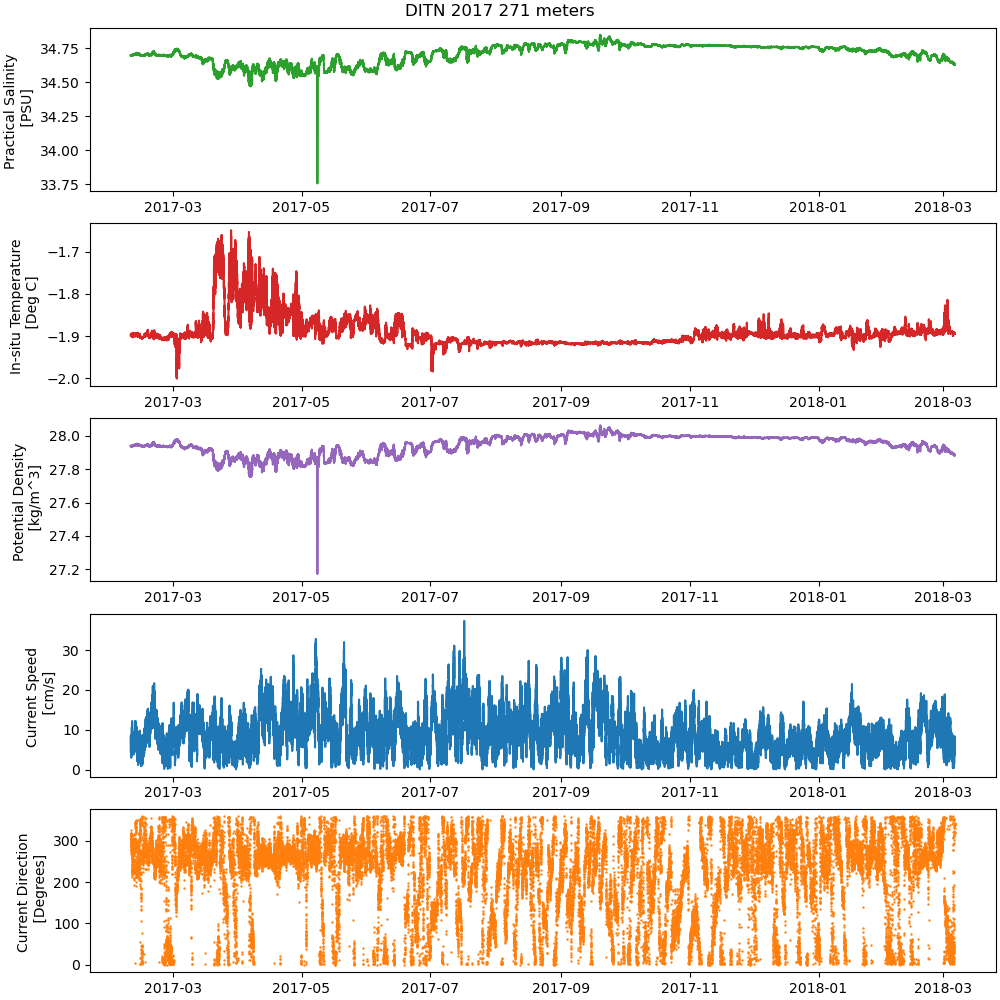

In [46]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITN_2017.ctd.mid
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITN_2017.vel.mid
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITN 2017 271 meters')

In [48]:
ds.z.values

array(694)

Text(0.5, 0.98, 'DITN 2017 694 meters')

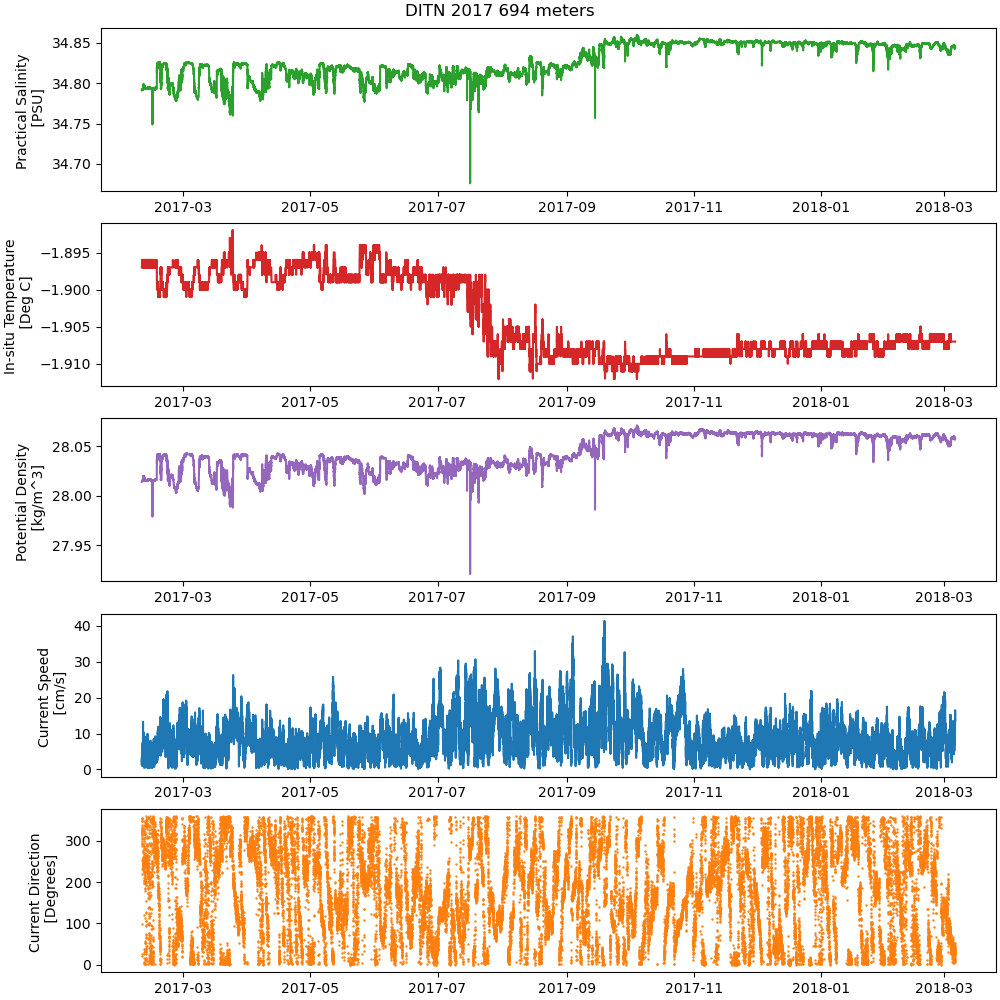

In [49]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = DITN_2017.ctd.bot
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = DITN_2017.vel.bot
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITN 2017 694 meters')

In [51]:
D_2017.ctd.top

<xarray.DataTree 'top'>
Group: /D/2017/ctd/top
    Dimensions:       (time: 35409)
    Coordinates:
      * time          (time) datetime64[ns] 283kB 2017-02-11T07:00:00 ... 2019-02...
        z             float64 8B ...
        lat           float64 8B ...
        lon           float64 8B ...
    Data variables:
        T_0           (time) float64 283kB ...
        S_0           (time) float64 283kB ...
        Conductivity  (time) float64 283kB ...
        S_2           (time) float64 283kB ...
        T_2           (time) float64 283kB ...
        sal           (time) float64 283kB 34.8 34.8 34.8 34.81 ... 34.77 34.77 nan
        temp          (time) float64 283kB -1.896 -1.896 -1.896 ... -1.907 -1.907
    Attributes: (12/14)
        cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
        cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
        water_depth_meters:              -1144
        instr_depth_meters:              -556
        instr_type:                      SBE 16
        instr_sn:                        1433
        ...                              ...
        samp_int_minutes:                30
        start_time:                      11/02/2017 07:00:00
        stop_time:                       18/02/2019 23:00:00
        level_0:                         Raw data
        level_1:                         Despiking
        level_2:                         CTD quality check

In [ ]:
def Calculate_TEOS10_vars(ds):

    if 'sal' not in ds:     # this skips D/2017/ctd which is not a dataset 
        return ds
    
    ds = ds.copy()  # important: DatasetView → writable Dataset

    ds['abs_sal'] = (
        'time',
        gsw.SA_from_SP(
            SP=ds['sal'].values,
            p=ds['z'].values,
            lon=ds['lon'].values,
            lat=ds['lat'].values,
        )
    )

    ds['theta'] = (
        'time',
        gsw.pt_from_t(
            SA=ds['abs_sal'].values,
            t=ds['temp'].values,
            p=ds['z'].values,
            p_ref=0,
        )
    )

    ds['CT'] = (
        'time',
        gsw.CT_from_pt(
            SA=ds['abs_sal'].values,
            pt=ds['theta'].values,
        )
    )

    ds['sigma0'] = (
        'time',
        gsw.sigma0(
            SA=ds['abs_sal'].values,
            CT=ds['CT'].values,
        )
    )

    return ds


In [97]:
D_2017.ctd = D_2017.ctd.map_over_datasets(Calculate_TEOS10_vars)

In [98]:
D_2017.ctd

<xarray.DataTree 'ctd'>
Group: /
├── Group: /top
│       Dimensions:       (time: 35409)
│       Coordinates:
│         * time          (time) datetime64[ns] 283kB 2017-02-11T07:00:00 ... 2019-02...
│           z             float64 8B 556.0
│           lat           float64 8B -75.14
│           lon           float64 8B 164.6
│       Data variables:
│           T_0           (time) float64 283kB ...
│           S_0           (time) float64 283kB ...
│           Conductivity  (time) float64 283kB ...
│           S_2           (time) float64 283kB ...
│           T_2           (time) float64 283kB ...
│           sal           (time) float64 283kB 34.8 34.8 34.8 34.81 ... 34.77 34.77 nan
│           temp          (time) float64 283kB -1.896 -1.896 -1.896 ... -1.907 -1.907
│           abs_sal       (time) float64 283kB 34.98 34.98 34.98 ... 34.94 34.94 nan
│           theta         (time) float64 283kB -1.909 -1.909 -1.909 ... -1.917 -1.92 nan
│           CT            (time) float64 283kB -1.906 -1.906 -1.906 ... -1.917 nan
│           sigma0        (time) float64 283kB 28.03 28.03 28.03 ... 28.01 28.01 nan
│       Attributes: (12/14)
│           cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
│           cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
│           water_depth_meters:              -1144
│           instr_depth_meters:              -556
│           instr_type:                      SBE 16
│           instr_sn:                        1433
│           ...                              ...
│           samp_int_minutes:                30
│           start_time:                      11/02/2017 07:00:00
│           stop_time:                       18/02/2019 23:00:00
│           level_0:                         Raw data
│           level_1:                         Despiking
│           level_2:                         CTD quality check
├── Group: /mid
│       Dimensions:       (time: 35409)
│       Coordinates:
│         * time          (time) datetime64[ns] 283kB 2017-02-11T07:25:00 ... 2019-02...
│           z             float64 8B 772.0
│           lat           float64 8B -75.14
│           lon           float64 8B 164.6
│       Data variables: (12/13)
│           T_0           (time) float64 283kB ...
│           S_0           (time) float64 283kB ...
│           Conductivity  (time) float64 283kB ...
│           Theta_0       (time) float64 283kB ...
│           Density       (time) float64 283kB ...
│           S_2           (time) float64 283kB ...
│           ...            ...
│           sal           (time) float64 283kB 34.81 34.81 34.81 ... 34.81 34.81 34.81
│           temp          (time) float64 283kB -1.892 -1.892 -1.892 ... -1.901 -1.901
│           abs_sal       (time) float64 283kB 34.99 34.99 34.99 ... 34.98 34.98 34.98
│           theta         (time) float64 283kB -1.912 -1.912 -1.912 ... -1.921 -1.921
│           CT            (time) float64 283kB -1.909 -1.909 -1.909 ... -1.918 -1.918
│           sigma0        (time) float64 283kB 28.04 28.04 28.04 ... 28.04 28.04 28.04
│       Attributes: (12/14)
│           cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
│           cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
│           water_depth_meters:              -1144
│           instr_depth_meters:              -772
│           instr_type:                      SBE 37
│           instr_sn:                        15451
│           ...                              ...
│           samp_int_minutes:                30
│           start_time:                      11/02/2017 07:25:00
│           stop_time:                       18/02/2019 23:25:00
│           level_0:                         Raw data
│           level_1:                         Despiking
│           level_2:                         CTD quality check
└── Group: /bot
        Dimensions:       (time: 10456)
        Coordinates:
          * time          (time) d

In [ ]:
# # calculate potential temp, absolute sal, conservative temp, etc.. 

# abs_sal = gsw.SA_from_SP(SP=D_2017.ctd.top.sal,
#                p = D_2017.ctd.top.z.values,
#                lon = D_2017.ctd.top.lon.values,
#                lat = D_2017.ctd.top.lat.values)


# theta = gsw.pt_from_t(SA=abs_sal, t=D_2017.ctd.top.temp, p = D_2017.ctd.top.z.values, p_ref=0)

# CT = gsw.CT_from_pt(SA=abs_sal, pt = theta)

# sigma0 = gsw.sigma0(SA=abs_sal, CT=CT)



In [100]:
D_2017.vel

<xarray.DataTree 'vel'>
Group: /D/2017/vel
├── Group: /D/2017/vel/top
│       Dimensions:  (time: 7691)
│       Coordinates:
│         * time     (time) datetime64[ns] 62kB 2017-02-11T20:00:00 ... 2017-12-29T06...
│           z        float64 8B ...
│           lat      float64 8B ...
│           lon      float64 8B ...
│       Data variables:
│           Mod_0    (time) float64 62kB ...
│           Dir_0    (time) float64 62kB ...
│           u        (time) float64 62kB ...
│           v        (time) float64 62kB ...
│       Attributes: (12/14)
│           cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
│           cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
│           water_depth_meters:              -1144
│           instr_depth_meters:              -576
│           instr_type:                      Aanderaa RCM7
│           instr_sn:                        11199
│           ...                              ...
│           samp_int_minutes:                30
│           start_time:                      11/02/2017 07:00:00
│           stop_time:                       18/02/2019 22:00:00
│           level_0:                         Raw data
│           level_1:                         Despiking
│           level_2:                         CTD quality check
├── Group: /D/2017/vel/mid
│       Dimensions:  (time: 35408)
│       Coordinates:
│         * time     (time) datetime64[ns] 283kB 2017-02-11T07:30:00 ... 2019-02-18T2...
│           z        float64 8B ...
│           lat      float64 8B ...
│           lon      float64 8B ...
│       Data variables:
│           u        (time) float64 283kB ...
│           v        (time) float64 283kB ...
│           Mod_0    (time) float64 283kB ...
│           Dir_0    (time) float64 283kB ...
│           TiltX    (time) float64 283kB ...
│           TiltY    (time) float64 283kB ...
│           Heading  (time) float64 283kB ...
│           AbsTilt  (time) float64 283kB ...
│           MaxTilt  (time) float64 283kB ...
│       Attributes: (12/14)
│           cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
│           cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
│           water_depth_meters:              -1144
│           instr_depth_meters:              -911
│           instr_type:                      Aanderaa Seaguard
│           instr_sn:                        1847
│           ...                              ...
│           samp_int_minutes:                30
│           start_time:                      11/02/2017 07:30:00
│           stop_time:                       18/02/2019 23:00:00
│           level_0:                         Raw data
│           level_1:                         Despiking
│           level_2:                         CTD quality check
└── Group: /D/2017/vel/bot
        Dimensions:  (time: 35357)
        Coordinates:
          * time     (time) datetime64[ns] 283kB 2017-02-11T07:02:19 ... 2019-02-17T2...
            z        float64 8B ...
            lat      float64 8B ...
            lon      float64 8B ...
        Data variables:
            u        (time) float64 283kB ...
            v        (time) float64 283kB ...
            Mod_0    (time) float64 283kB ...
            Dir_0    (time) float64 283kB ...
            T_0      (time) float64 283kB ...
            TiltX    (time) float64 283kB ...
            TiltY    (time) float64 283kB ...
            Heading  (time) float64 283kB ...
        Attributes: (12/14)
            cruise_deployment:               PNRA - XXXII Expedition - 2016/17  
            cruise_recovery:                 PNRA - XXXIV Expedition - 2019/20
            water_depth_meters:              -1144
            instr_depth_meters:              -1135
            instr_type:                      Aanderaa Seaguard
            instr_sn:                        444
            ...                              ...
            samp_int_minutes:     

AttributeError: 'DataTree' object has no attribute 'speed'

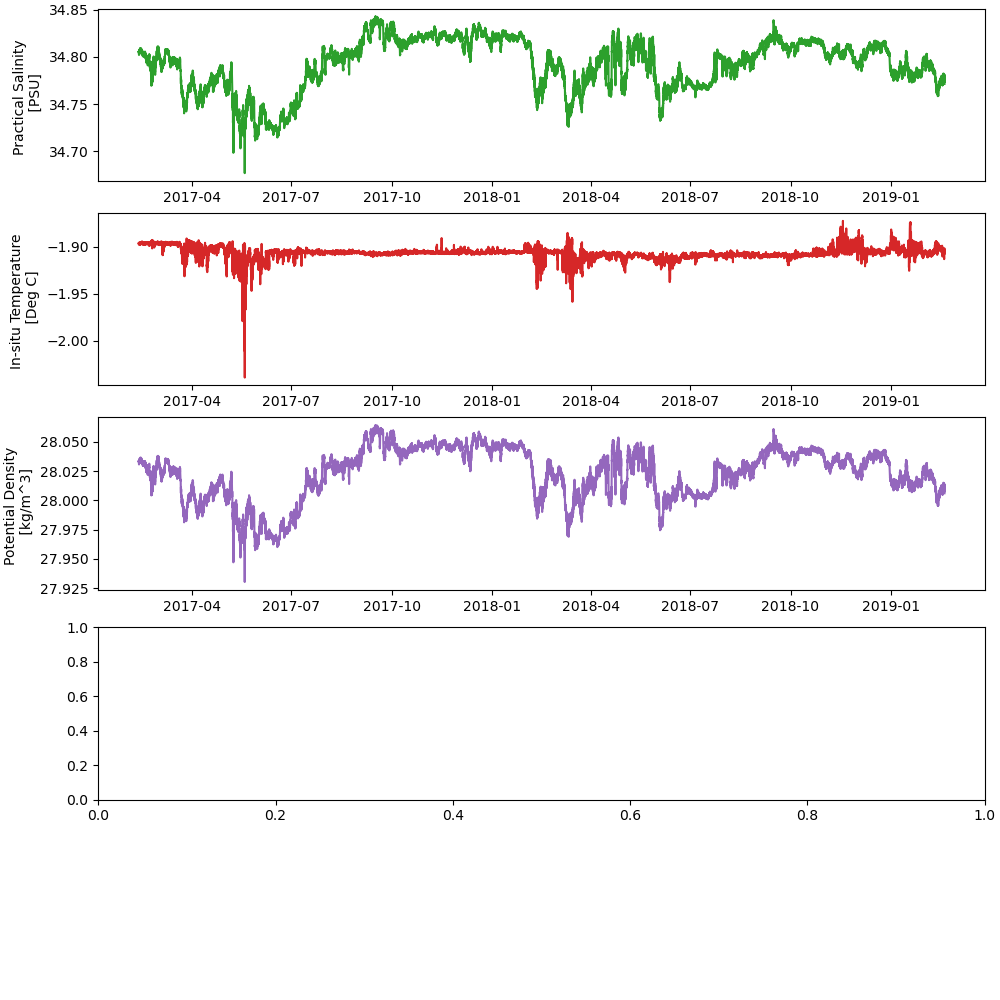

In [99]:
fig = plt.figure(figsize=(10,10), constrained_layout=True)

ds = D_2017.ctd.top
plt.subplot(5,1,1)
plt.plot(ds.time,ds.sal,color='tab:green')
plt.ylabel('Practical Salinity \n [PSU]')

plt.subplot(5,1,2)
plt.plot(ds.time,ds.temp, color='tab:red')
plt.ylabel('In-situ Temperature \n [Deg C]')

plt.subplot(5,1,3)
plt.plot(ds.time,ds.sigma0, color='tab:purple')
plt.ylabel('Potential Density \n [kg/m^3]')

ds = D_2017.vel.top
plt.subplot(5,1,4)
plt.plot(ds.time,ds.speed, color='tab:blue')
plt.ylabel('Current Speed \n [cm/s]')

plt.subplot(5,1,5)
plt.scatter(ds.time,ds.dir,s=0.5, color='tab:orange')
plt.ylabel('Current Direction \n [Degrees]')

plt.suptitle('DITN 2017 76 meters')

In [38]:
ds.z.values

array(384)